# Predicting Wine Quality

# Importing Wine Data

Trying to help consumers determine which wine is of good / bad quality, by predicting based on ingredients in the wine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
winequality = pd.read_csv('winequality-red.csv')

In [3]:
winequality.shape

(1599, 12)

In [4]:
display(winequality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


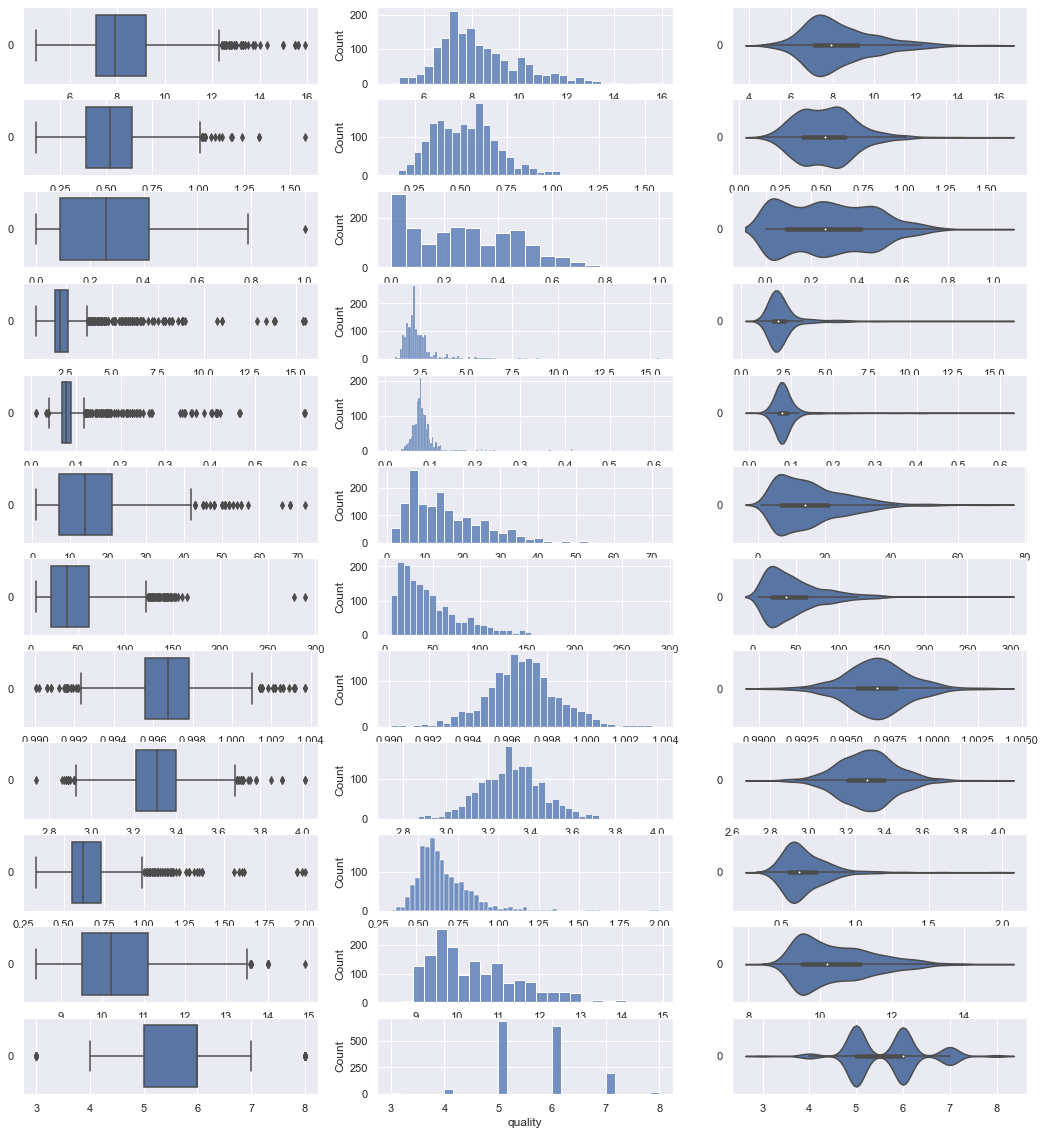

In [7]:
# Draw the distributions of all variables
f, axes = plt.subplots(12, 3, figsize=(18, 20))

count = 0
for var in winequality:
    sb.boxplot(data = winequality[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = winequality[var], ax = axes[count,1])
    sb.violinplot(data = winequality[var], orient = "h", ax = axes[count,2])
    count += 1

# Cleaning to Remove Outliers

In [8]:
# Copy to new dataframe
winedata = winequality[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].copy()

In [9]:
# Calculate the quartiles
Q1 = winedata.quantile(0.25)
Q3 = winedata.quantile(0.75)

# Rule to identify outliers
rule = ((winedata < (Q1 - 1.5 * (Q3 - Q1))) | (winedata > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64

In [10]:
# Find the rows where any column is True
outliers = rule.any(axis = 1)   

# Check the outliers -- it's a boolean series
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Length: 1599, dtype: bool

In [11]:
# Number of points of outliers for the two variables combined
outliers.value_counts()

False    1179
True      420
dtype: int64

In [12]:
# Row indices that correspond to outliers in the dataframe
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([   9,   11,   13,   14,   15,   17,   18,   19,   33,   35,
            ...
            1552, 1558, 1559, 1560, 1561, 1570, 1571, 1574, 1577, 1589],
           dtype='int64', length=420)

In [13]:
# Remove the outliers based on the row indices obtained above
winedata.drop(axis = 0, index = outlierindices, inplace = True)         

# Check the clean data
winedata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
# Add new column representing whether the wine is bad or good
def newquality(row):
    if row['quality'] <= 5:
        return 'bad'
    else:
        return 'good'

winedata['newquality'] = winedata.apply(newquality, axis=1)
display(winedata)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.271010     0.659397   
volatile acidity          -0.271010          1.000000    -0.627194   
citric acid                0.659397         -0.627194     1.000000   
residual sugar             0.229653          0.035215     0.149494   
chlorides                  0.197774          0.117805     0.073031   
free sulfur dioxide       -0.150845         -0.016718    -0.068852   
total sulfur dioxide      -0.087083          0.097487     0.004660   
density                    0.610125          0.044174     0.305458   
pH                        -0.684378          0.220702    -0.470286   
sulphates                  0.165367         -0.317346     0.256747   
alcohol                   -0.037999         -0.220600     0.137762   
quality                    0.113422         -0.346962     0.212133   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<AxesSubplot:>

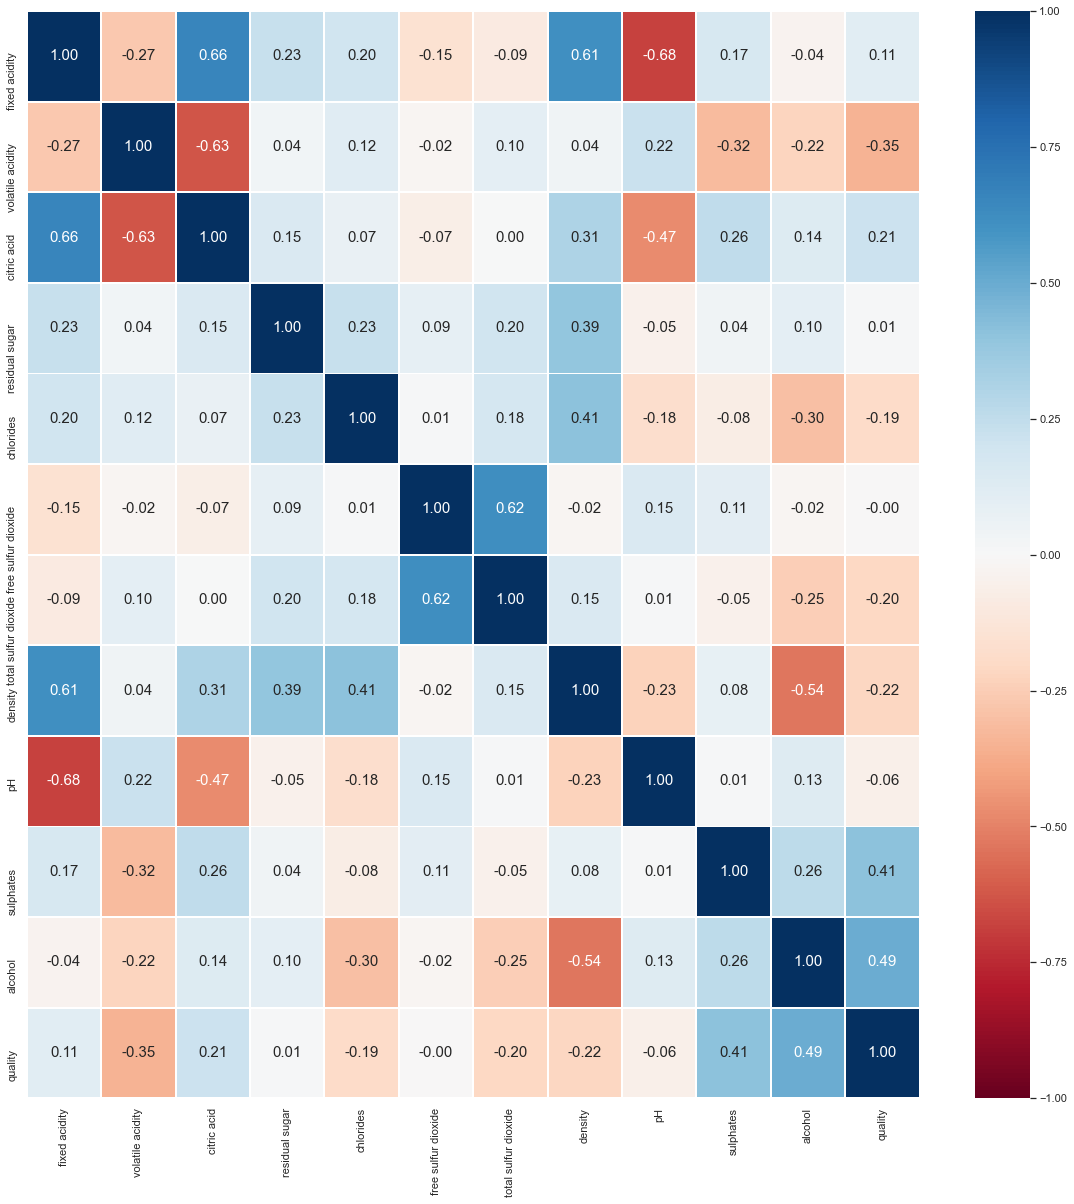

In [15]:
# Correlation Matrix
print(winedata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(winedata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 15}, cmap = "RdBu")

# Decision Tree

In [16]:
# allocating response + predictors
y = pd.DataFrame(winedata["newquality"])
X = pd.DataFrame(winedata[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])

In [17]:
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (884, 1) (884, 11)
Test Set  : (295, 1) (295, 11)


In [18]:
# response stats summary
y_train["newquality"].value_counts()

good    482
bad     402
Name: newquality, dtype: int64

In [19]:
# predictors stats summary
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.00000,884.000000,884.000000
mean,8.150679,0.519434,0.246233,2.175452,0.078399,14.903846,42.038462,0.996549,3.32457,0.633620,10.368005
std,1.467623,0.165065,0.178193,0.444620,0.014715,8.774695,26.173104,0.001594,0.13454,0.116999,0.978496
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.94000,0.370000,8.700000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,8.000000,22.000000,0.995500,3.23000,0.550000,9.500000
50%,7.850000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.32000,0.610000,10.100000
75%,9.000000,0.630000,0.390000,2.400000,0.087000,20.000000,56.000000,0.997600,3.41000,0.700000,11.000000
max,12.300000,1.005000,0.690000,3.600000,0.119000,41.000000,122.000000,1.001000,3.68000,0.980000,13.400000


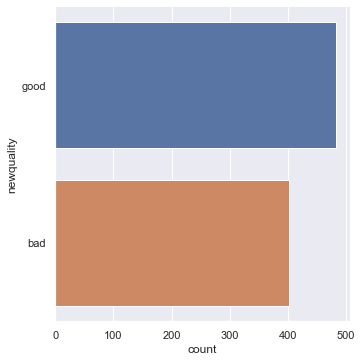

In [20]:
# distribution of responses
sb.catplot(y = "newquality", data = y_train, kind = "count")

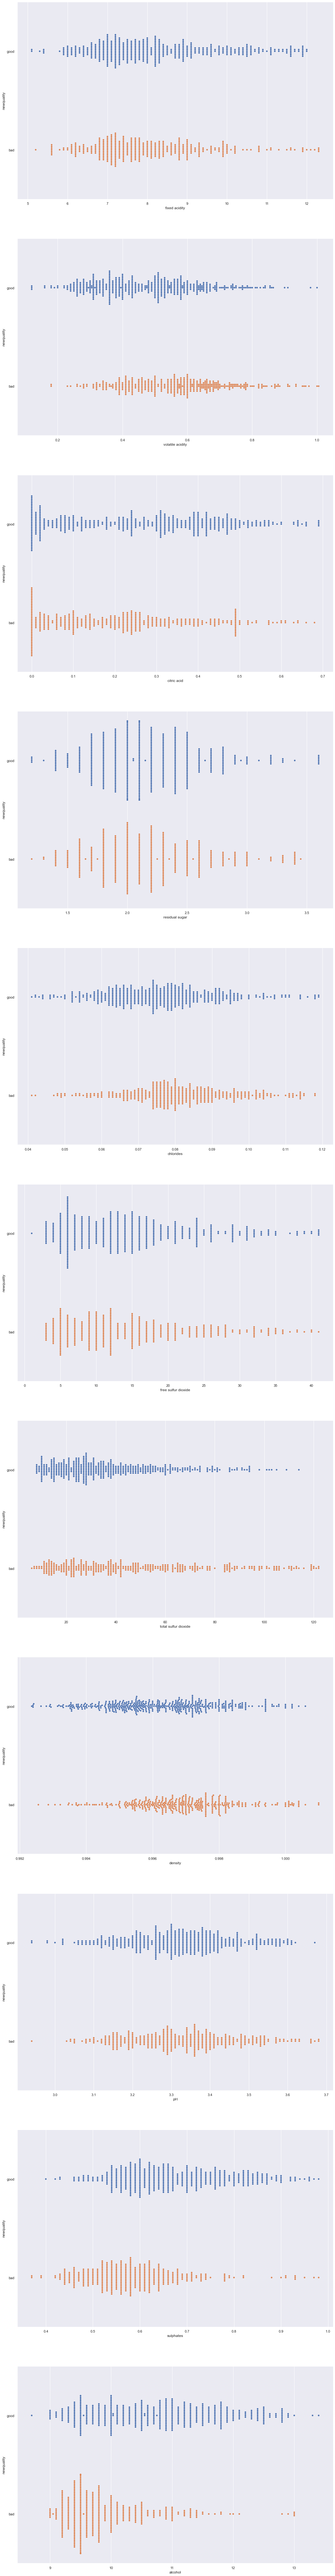

In [21]:
# rs between response and predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(11, 1, figsize=(18, 150))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "newquality", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [22]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create the tree object
dectree = DecisionTreeClassifier(max_depth = 3)

In [23]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(669.6, 1141.5600000000002, 'alcohol <= 10.525\ngini = 0.496\nsamples = 884\nvalue = [402, 482]\nclass = good'),
 Text(334.8, 815.4000000000001, 'sulphates <= 0.625\ngini = 0.476\nsamples = 560\nvalue = [341, 219]\nclass = bad'),
 Text(167.4, 489.24, 'sulphates <= 0.525\ngini = 0.408\nsamples = 361\nvalue = [258, 103]\nclass = bad'),
 Text(83.7, 163.07999999999993, 'gini = 0.22\nsamples = 111\nvalue = [97, 14]\nclass = bad'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.459\nsamples = 250\nvalue = [161, 89]\nclass = bad'),
 Text(502.20000000000005, 489.24, 'alcohol <= 9.85\ngini = 0.486\nsamples = 199\nvalue = [83, 116]\nclass = good'),
 Text(418.5, 163.07999999999993, 'gini = 0.491\nsamples = 113\nvalue = [64, 49]\nclass = bad'),
 Text(585.9, 163.07999999999993, 'gini = 0.344\nsamples = 86\nvalue = [19, 67]\nclass = good'),
 Text(1004.4000000000001, 815.4000000000001, 'sulphates <= 0.715\ngini = 0.306\nsamples = 324\nvalue = [61, 263]\nclass = good'),
 Text(837.0, 489.

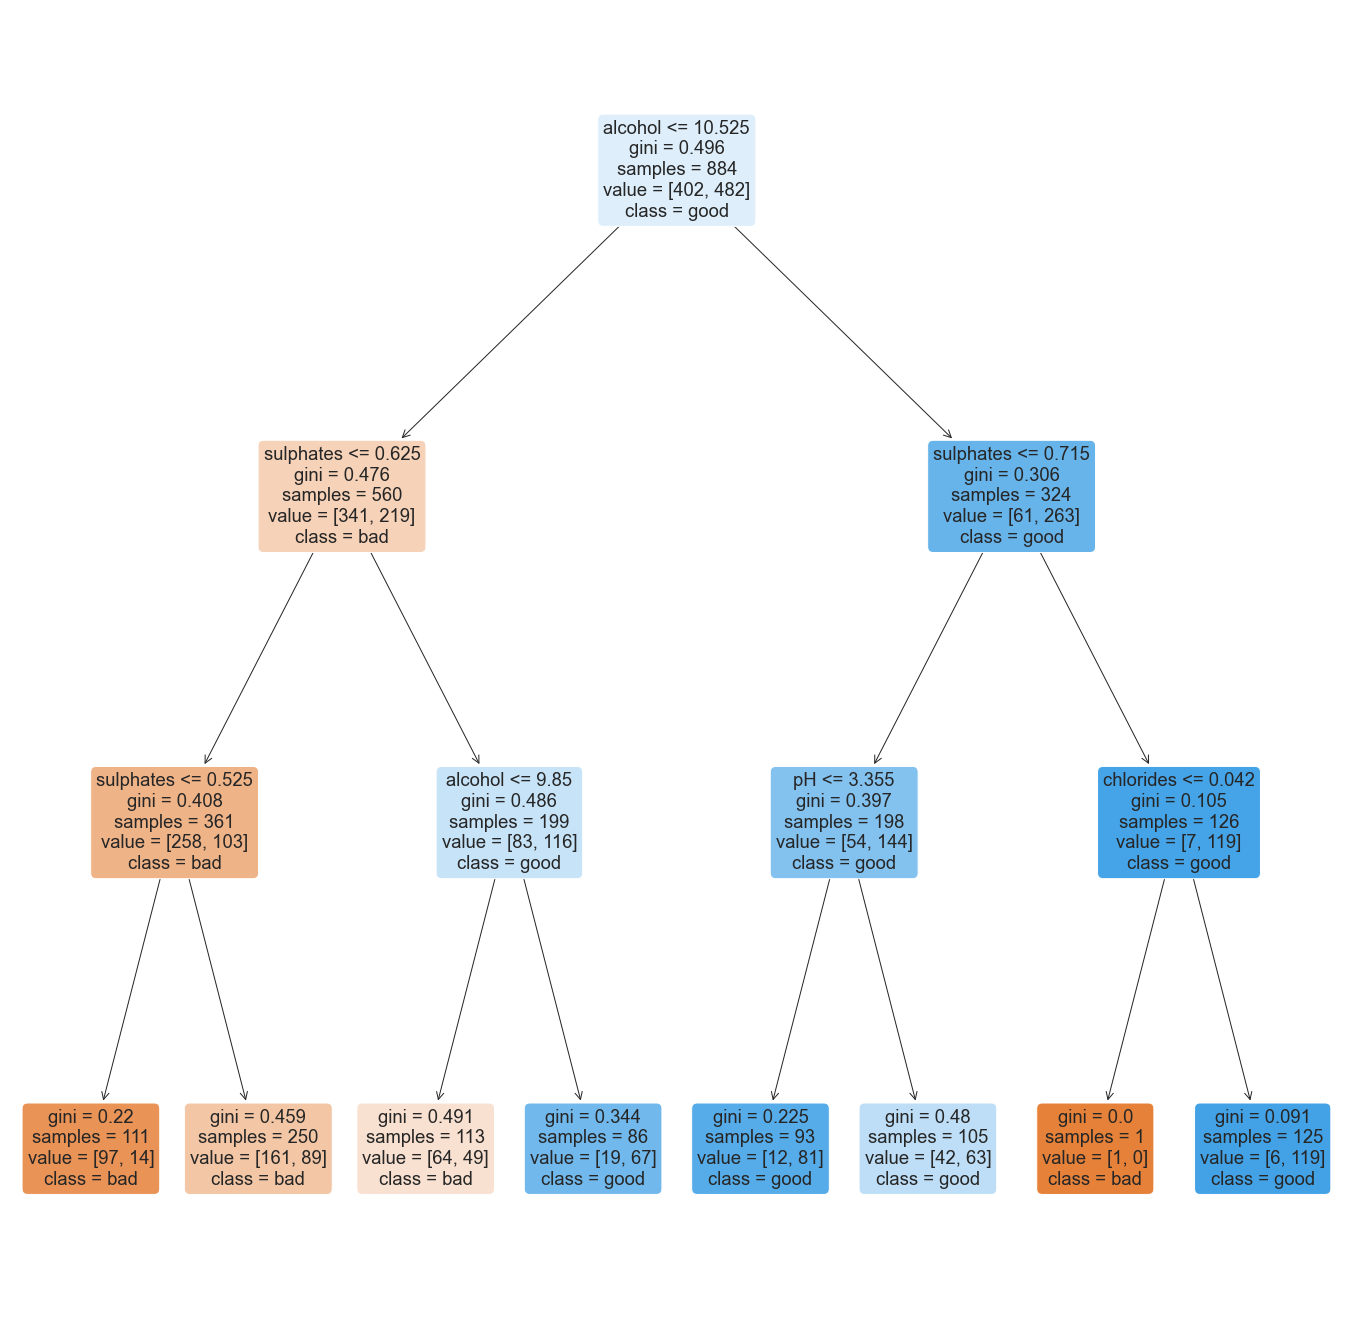

In [24]:
# plot decision tree for TRAIN
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Classification Accuracy 	: 0.7386877828054299


<AxesSubplot:>

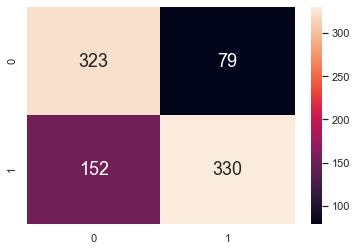

In [25]:
# predict newquality corresponding to other variables TRAIN
y_train_pred = dectree.predict(X_train)

# use TP / TN to find classification accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# plot confusion matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.7084745762711865


<AxesSubplot:>

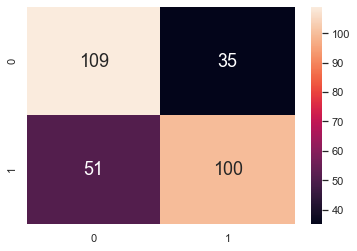

In [26]:
# predict newquality corresponding to other variables TEST
y_test_pred = dectree.predict(X_test)

# use TP / TN to find classification accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# plot confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Predicting using Examples for Decision Tree

looking for wines with specific alcohol or pH levels
eg. when alcohol == 10.75, pH == 3 and alcohol == 9.5

In [27]:
display(winedata)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [28]:
# unique wine 1
wd1 = winedata.loc[winedata['alcohol'] == 10.75]
wd1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.3,0.56,10.75,6,good


In [29]:
#unique wine 2
wd2 = winedata.loc[winedata['pH'] == 3]
wd2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
432,11.9,0.37,0.69,2.3,0.078,12.0,24.0,0.9958,3.0,0.65,12.8,6,good


In [30]:
# unique wine 3
wd3 = winedata.loc[winedata['alcohol'] == 9.05]
wd3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
1521,6.9,0.48,0.2,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,4,bad


In [31]:
# combine uniques into a table
wd_pred1 = pd.concat ([wd1, wd2, wd3])

In [32]:
wd_pred1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6,good
432,11.9,0.370,0.69,2.3,0.078,12.0,24.0,0.99580,3.00,0.65,12.80,6,good
1521,6.9,0.480,0.20,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,4,bad


In [33]:
# taking out predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

In [34]:
# using predictors for prediction
X_pred1 = pd.DataFrame(wd_pred1[predictors])

# predict the response (quality) using predictors 
y_pred1 = dectree.predict(X_pred1)
y_pred1

array(['good', 'good', 'bad'], dtype=object)

In [35]:
# summary - includes actual data + predicted
y_pred1 = pd.DataFrame(y_pred1, columns = ["PredQuality"], index = wd_pred1.index)
wd_actual1 = pd.concat([wd_pred1[["pH", "alcohol", "newquality"]], y_pred1], axis = 1)

wd_actual1

,pH,alcohol,newquality,PredQuality
1542,3.30,10.75,good,good
432,3.00,12.80,good,good
1521,3.39,9.05,bad,bad


In [36]:
# predict probabilites
y_prob1 = dectree.predict_proba(X_pred1)
y_prob1

array([[0.12903226, 0.87096774],
       [0.12903226, 0.87096774],
       [0.87387387, 0.12612613]])

In [37]:
# add probaility wine is good to table
y_prob1 = pd.DataFrame(list(y_prob1[:,1]), columns = ["ProbGood"], index = wd_pred1.index)
wd_conf1 = pd.concat([wd_actual1, y_prob1], axis = 1)

wd_conf1

,pH,alcohol,newquality,PredQuality,ProbGood
1542,3.30,10.75,good,good,0.870968
432,3.00,12.80,good,good,0.870968
1521,3.39,9.05,bad,bad,0.126126


# Random Forest

In [38]:
# allocating response + predictors
y = pd.DataFrame(winedata["newquality"])
X = pd.DataFrame(winedata[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])

In [39]:
# import random forest 
from sklearn.ensemble import RandomForestClassifier

# create the random forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree
# random forest on TRAIN
y_train = np.ravel(y_train, order='C')
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9920814479638009

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7830508474576271



<AxesSubplot:>

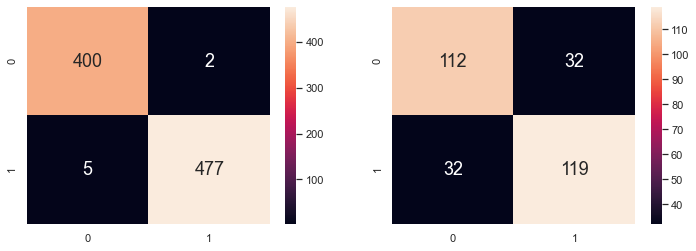

In [40]:
# predict newquality corresponding to other variables TRAIN + TEST
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# goodness of fit TRAIN
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# goodness of fit TEST
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# confusion matrix for both TEST and TRAIN
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Predicting using Examples for Random Forest

In [41]:
display(winedata)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [42]:
# unique wine 1
wd4 = winedata.loc[winedata['alcohol'] == 10.75]
wd4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.3,0.56,10.75,6,good


In [43]:
# unique wine 2
wd5 = winedata.loc[winedata['pH'] == 3]
wd5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
432,11.9,0.37,0.69,2.3,0.078,12.0,24.0,0.9958,3.0,0.65,12.8,6,good


In [44]:
# unique wine 3
wd6 = winedata.loc[winedata['alcohol'] == 9.05]
wd6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
1521,6.9,0.48,0.2,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,4,bad


In [45]:
# combine uniques into a table
wd_pred2 = pd.concat ([wd4, wd5, wd6])

In [46]:
# taking out predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

In [47]:
# using predictors for prediction
X_pred2 = pd.DataFrame(wd_pred2[predictors])

# predict the response (quality) using predictors
y_pred2 = rforest.predict(X_pred2)
y_pred2

array(['good', 'good', 'bad'], dtype=object)

In [48]:
# summary - includes actual data + predicted
y_pred2 = pd.DataFrame(y_pred2, columns = ["PredQuality"], index = wd_pred2.index)
wd_actual2 = pd.concat([wd_pred2[["pH", "alcohol", "newquality"]], y_pred2], axis = 1)

wd_actual2

,pH,alcohol,newquality,PredQuality
1542,3.30,10.75,good,good
432,3.00,12.80,good,good
1521,3.39,9.05,bad,bad


In [49]:
# predict probabilites
y_prob2 = rforest.predict_proba(X_pred2)
y_prob2

array([[0.12600628, 0.87399372],
       [0.06690423, 0.93309577],
       [0.8430388 , 0.1569612 ]])

In [50]:
# add probability wine is good to table
y_prob2 = pd.DataFrame(list(y_prob2[:,1]), columns = ["ProbGood"], index = wd_pred2.index)
wd_conf2 = pd.concat([wd_actual2, y_prob2], axis = 1)

wd_conf2

,pH,alcohol,newquality,PredQuality,ProbGood
1542,3.30,10.75,good,good,0.873994
432,3.00,12.80,good,good,0.933096
1521,3.39,9.05,bad,bad,0.156961
